In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Load Dataset
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# 2. Data Preprocessing
df['label'] = df['label'].map({'spam': 1, 'ham': 0})
X = df['text']
y = df['label']

# 3. Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y, test_size=0.2, random_state=42
)

# 5. Model Training (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 7. Prediction Function
def predict_spam(email_text):
    vect = vectorizer.transform([email_text])
    prediction = model.predict(vect)
    return 'Spam' if prediction[0] == 1 else 'Not Spam'

# Example usage
print(predict_spam("You won $1000! Click here to claim your prize."))  # Should print 'Spam'


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.97      0.61      0.75       150

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115

Spam


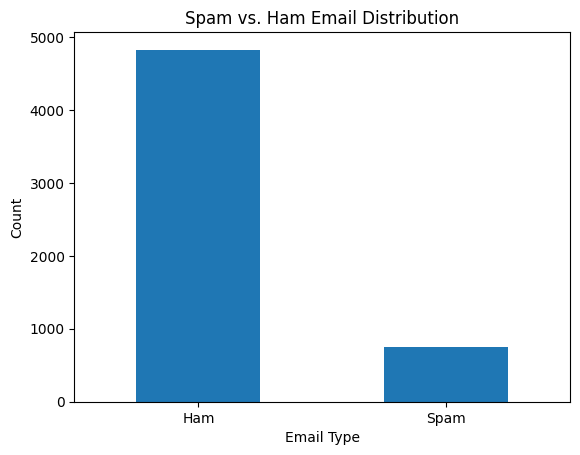

In [ ]:
import matplotlib.pyplot as plt

# Visualize spam vs. ham distribution
df['label'].value_counts().plot(kind='bar')
plt.title('Spam vs. Ham Email Distribution')
plt.xticks([0, 1], ['Ham', 'Spam'], rotation=0)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

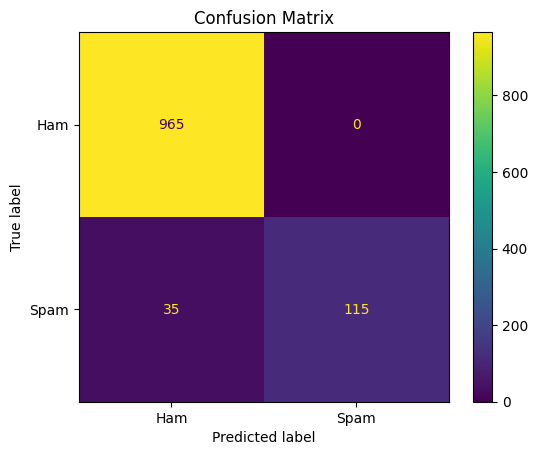

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.show()